In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from scipy.stats import linregress


import plotly
plotly.tools.set_credentials_file(username='8135tao', api_key='wyGWY4LmNGNohXtJ3vmo')
import plotly.plotly as py
import plotly.graph_objs as go


In [3]:
total_expo_bystate_mean_df=pd.read_csv('Total export by state.csv')
total_expo_bystate_mean_df.head()

,state,mean,code
0,Texas,228.96,TX
1,California,153.45,CA
2,New York,78.23,NY
3,Washington,69.04,WA
4,Illinois,58.50,IL


In [4]:
for col in total_expo_bystate_mean_df.columns:
    total_expo_bystate_mean_df[col] = total_expo_bystate_mean_df[col].astype(str)

# scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#             [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# scl = [[0.0, 'rgb(220,110,110)'],[0.2, 'rgb(180,90,90)'],[0.4, 'rgb(150,75,75)'],\
#             [0.6, 'rgb(120,60,60)'],[0.8, 'rgb(100,50,50)'],[1.0, 'rgb(50,25,25)']]

scl = [[0.0, 'rgb(220,110,110)'],[0.25, 'rgb(100,50,50)'],[1.0, 'rgb(50,25,25)']]

total_expo_bystate_mean_df['text'] = total_expo_bystate_mean_df['state'] + '<br>' +\
    'Average Export $'+total_expo_bystate_mean_df['mean']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = total_expo_bystate_mean_df['code'],
        z = total_expo_bystate_mean_df['mean'].astype(float),
        locationmode = 'USA-states',
        text = total_expo_bystate_mean_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Billions USD"
        )
    ) ]

layout = dict(
        title = '2007-2017 Average Total Exports by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'd3-cloropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~8135tao/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [63]:
mean_gdp_expo_impo_df=pd.read_csv('mean_impo_expo_gdp_country.csv')
mean_gdp_expo_impo_df.head()


#balance = export - import

,Country Name,mean export,mean import,mean gdp,mean balance
0,Canada,2.699056e+11,3.055898e+11,1.632974e+12,-3.568420e+10
1,Mexico,1.927331e+11,2.540407e+11,1.120824e+12,-6.130760e+10
2,China,9.855385e+10,4.000182e+11,7.784747e+12,-3.014644e+11
3,Japan,6.314260e+10,1.312996e+11,5.217301e+12,-6.815696e+10
4,United Kingdom,5.211265e+10,5.387572e+10,2.736682e+12,-1.763073e+09


#median value and countries with median

In [6]:
def findMedianCountry(mean):
    mean_data = mean_gdp_expo_impo_df[mean]
    median = np.median(mean_data)
    print(f'median {mean} is {median}')
    
    norm = (mean_gdp_expo_impo_df[mean]-median).abs()
    median_country = mean_gdp_expo_impo_df.iloc[norm.argsort()[:1],0].values[0]
    print( f'country with {mean} closest to median is {median_country}\n')
    
    q1 = np.percentile(mean_data, 25)
    q3 = np.percentile(mean_data, 75)
    
    # Print the quartiles
    print(f"Q1 is {q1}")
    print(f"Q3 is {q3}")
    # Calculate the interquartile range
    iqr = (q3 - q1)
    print("interquartile range:", iqr)
    lower_boundary = q1 - (1.5 * iqr)
    print(lower_boundary)
    
    # Find upper boundary
    # Q3 + 1.5 * IQR
    upper_boundary = q3 + (1.5 * iqr)
    print(upper_boundary)
    print("\n")
    # count lower outliers
    print(len(mean_data[mean_data <= lower_boundary]))
    #count upper outliers
    print(len(mean_data[mean_data >= upper_boundary]))


In [7]:
findMedianCountry('mean export')
#453,423,666 = 453 million

median mean export is 453423666.2
country with mean export closest to median is Malta

Q1 is 78009070.55000001
Q3 is 3485983527.1499996
interquartile range: 3407974456.5999994
-5033952614.349999
8597945212.05


0
25


In [8]:
findMedianCountry('mean import')
#420 102 700  =420 million

median mean import is 420102700.7
country with mean import closest to median is Kenya

Q1 is 48397715.5
Q3 is 5224922327.450001
interquartile range: 5176524611.950001
-7716389202.425001
12989709245.375002


0
24


In [9]:
findMedianCountry('mean gdp')
# 28 980 304 919 = 28 billion

median mean gdp is 28980304919.014988
country with mean gdp closest to median is Cameroon

Q1 is 7507799266.4836445
Q3 is 179533754114.54306
interquartile range: 172025954848.05942
-250531133005.60547
437572686386.6322


0
23


In [10]:
findMedianCountry('mean balance')
# 5,292,508 

median mean balance is 5292508.0
country with mean balance closest to median is Andorra

Q1 is -1371059347.3999996
Q3 is 193751621.05
interquartile range: 1564810968.4499996
-3718275800.074999
2540968073.7249994


26
13


In [67]:
def plotdata(mean,df):
    y_axis= df['mean gdp']/10**12

    x_axis= df[mean]/10**9


    #max_x = max(x_axis)
    max_y = max(y_axis)

    (slope, intercept, rvalue , pvalue , _) = linregress(x_axis, y_axis)
    fit = slope * x_axis + intercept

    print(f'R^2 value is {rvalue**2}')
    print(f'p value is {pvalue}')

    fig, ax = plt.subplots(1,1,figsize=(24,16))


    ax.plot(x_axis,fit
            ,'orange'
            ,linewidth=3)

    ax.scatter( x_axis
               ,y_axis
               ,s=2500*y_axis/max_y
              )

    ax.set_ylabel("mean gdp(trillion dollars)",fontsize=24)
    ax.set_xlabel(f"US {mean}(billion dollars)",fontsize=24)
    ax.grid()
    fig.savefig(f"GDPvs{mean}.png")

    plt.show()

In [ ]:
plotdata('mean export',mean_gdp_expo_impo_df)

R^2 value is 0.26937832907177583
p value is 3.528220960715885e-13


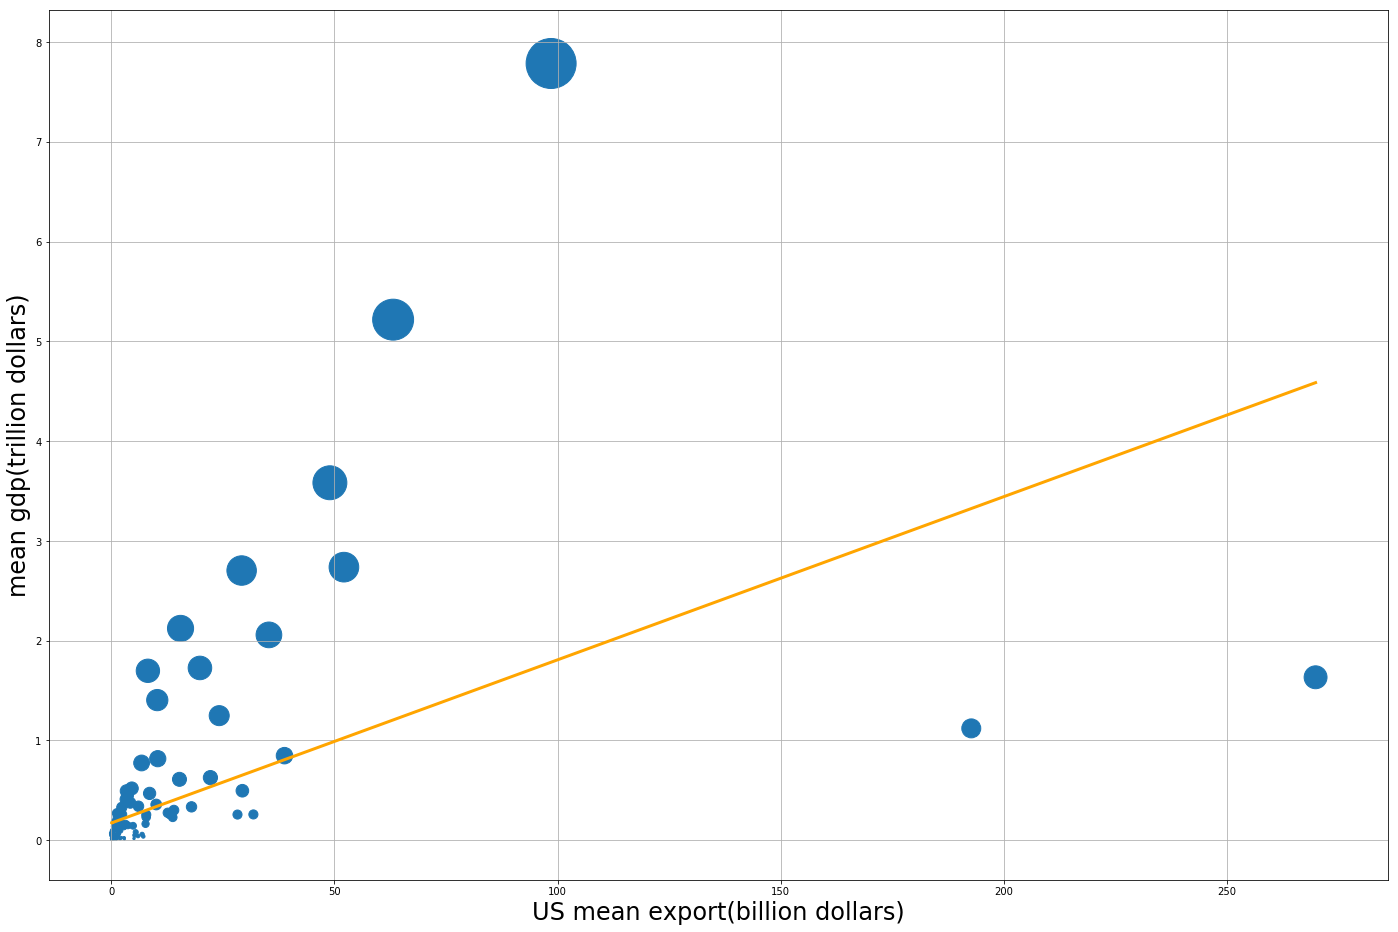

In [68]:
plotdata('mean export',mean_gdp_expo_impo_df)

R^2 value is 0.5872616970900101
p value is 2.664953325945099e-34


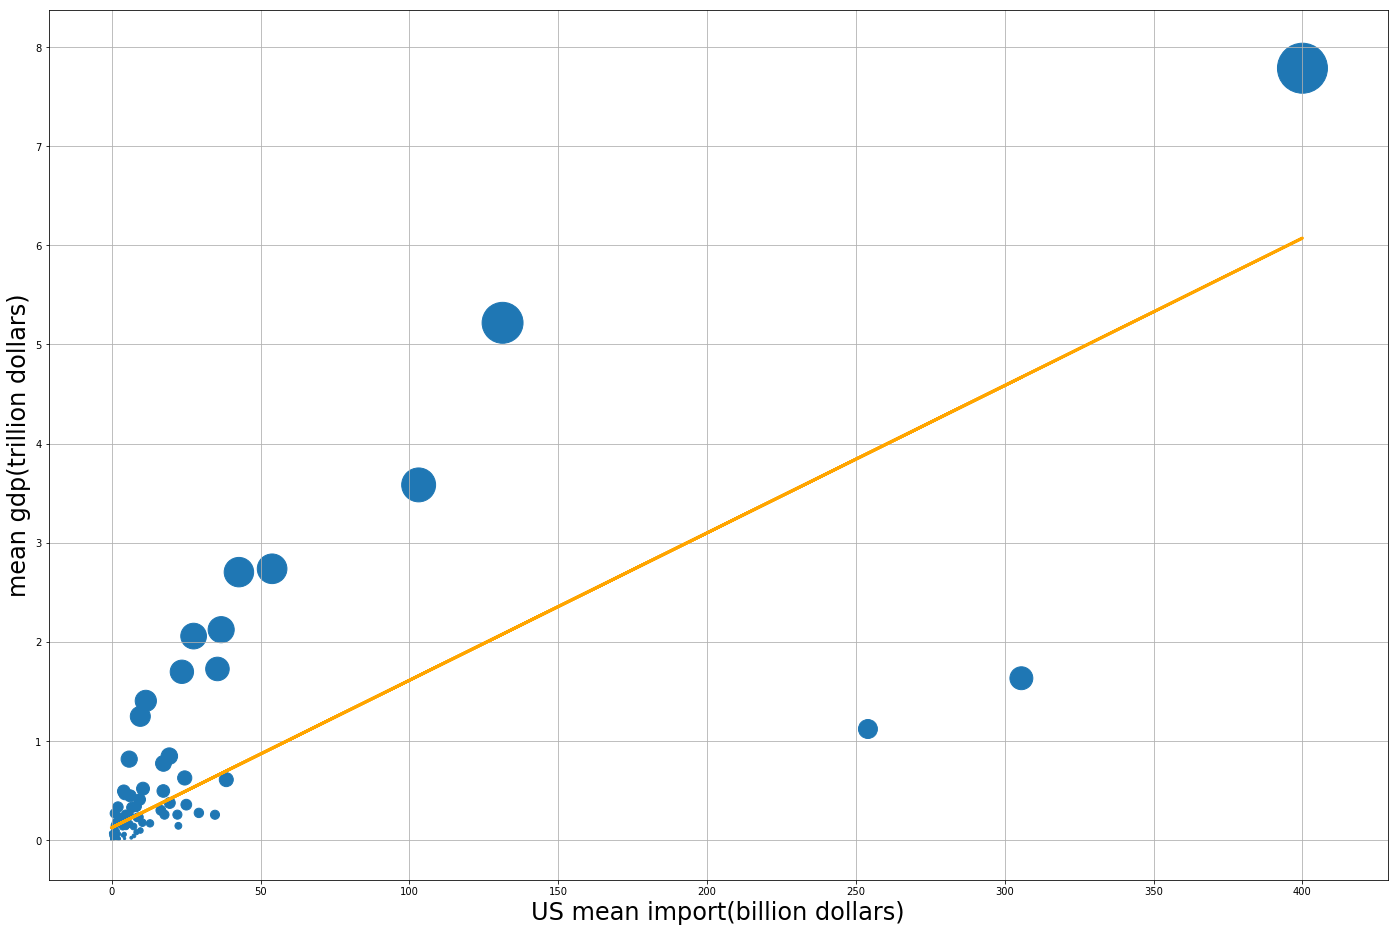

In [69]:
plotdata('mean import',mean_gdp_expo_impo_df)

R^2 value is 0.6365107068842305
p value is 5.566150446169808e-39


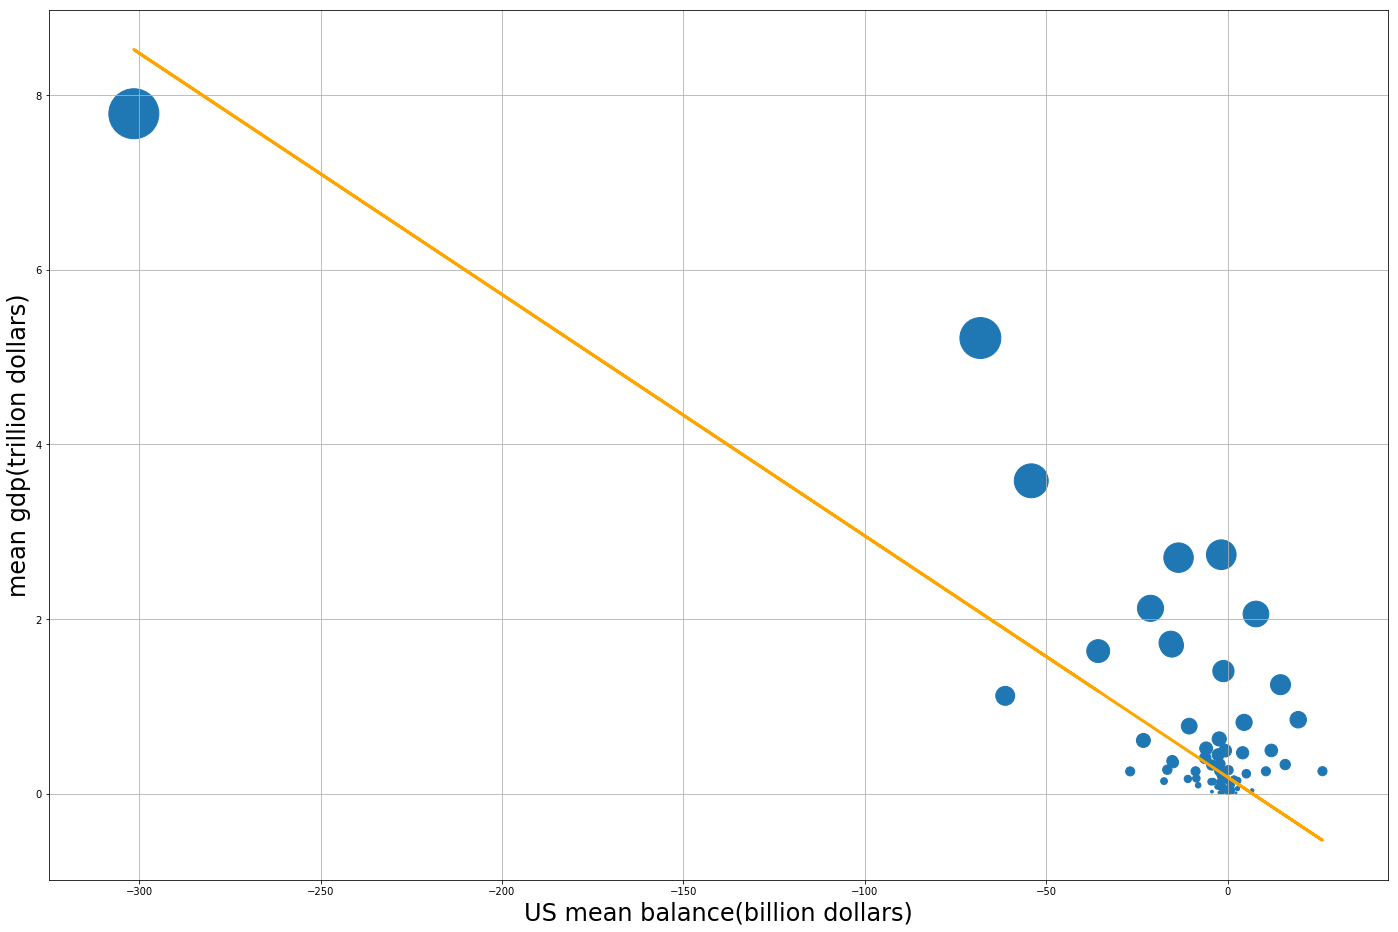

In [70]:
plotdata('mean balance',mean_gdp_expo_impo_df)

In [31]:
def findCountry(x,y,mean) :
    y_axis = mean_gdp_expo_impo_df['mean gdp']/10**12
    x_axis = mean_gdp_expo_impo_df[mean]/10**9

    norm = (x_axis-x)**2+(y_axis-y)**2

    return mean_gdp_expo_impo_df.iloc[norm.argsort()[:1]]

In [32]:
list_country_names = mean_gdp_expo_impo_df['Country Name']


In [38]:
def plotdata2(mean):
    y_axis = mean_gdp_expo_impo_df['mean gdp']/10**12
    x_axis= mean_gdp_expo_impo_df[mean]/10**9
    
    (slope, intercept, rvalue , pvalue , _) = linregress(x_axis, y_axis)
    fit = slope * x_axis + intercept

    print(f'R^2 value is {rvalue**2}')
    print(f'p value is {pvalue}')
    
    trace = go.Scatter(
        x = x_axis,
        y = y_axis,
        mode = 'markers',
        name = 'Country',
        text= list_country_names
    )
    trace2 = go.Scatter(
                      x=x_axis,
                      y=fit,
                      mode='lines',
                      name='Fit'
                      )
    data = [trace,trace2]

    layout = go.Layout(
        title=f'GDP vs US {mean} (10 years average)',
        xaxis=dict(
            title=f'{mean} (billions of dollars)',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title= 'GDP (trillions of dollars)',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )

    fig = go.Figure(data=data, layout=layout)

    # Plot and embed in ipython notebook!
    #url = py.plot(fig, filename='gdp vs balance')
    #print(url)
    
    print(py.plot(fig, filename=f'gdp vs {mean}'))
    
    return py.iplot(fig, filename=f'gdp vs {mean}')

In [34]:
plotdata2('mean export')

R^2 value is 0.26937832907177583
p value is 3.528220960715885e-13
https://plot.ly/~8135tao/14


R^2 value is 0.8179841647583913
p value is 1.1274705330364444e-63


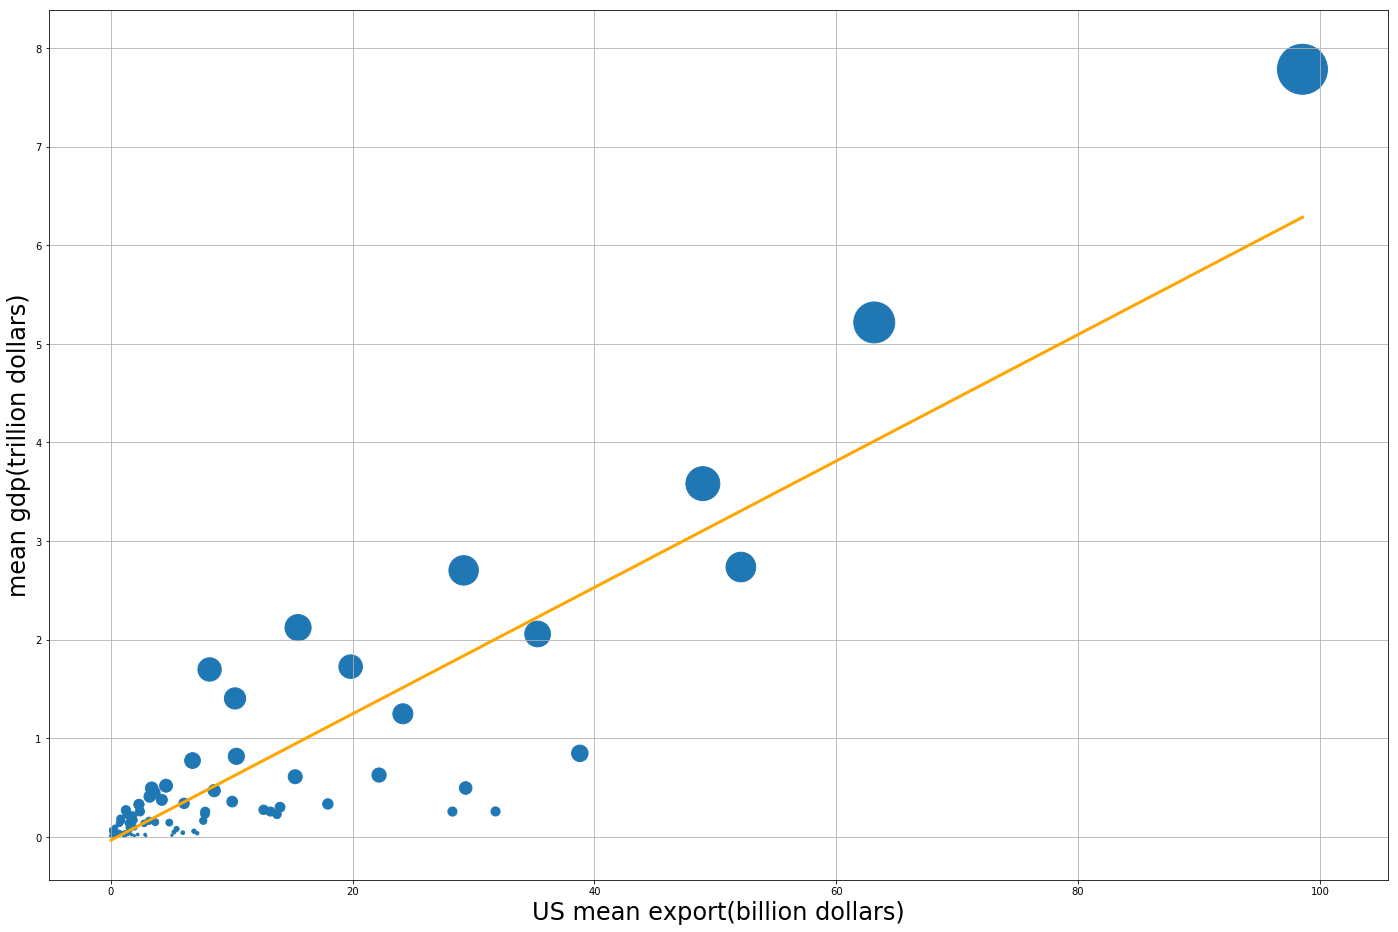

In [71]:
mean_gdp_no_Canada_Mexico = mean_gdp_expo_impo_df.loc[2:,:]
mean_gdp_no_Canada_Mexico.head()

plotdata('mean export',mean_gdp_no_Canada_Mexico)


In [35]:
findCountry(1,192,'mean export')

,Country Name,mean export,mean import,mean gdp,mean balance
16,Italy,1.548957e+10,3.676437e+10,2.122660e+12,-2.127481e+10


In [55]:
def topFiveCountryRatio(mean):
    return np.sum( mean_gdp_expo_impo_df.sort_values(by = [mean],ascending = False).head()[mean] )/np.sum(mean_gdp_expo_impo_df[mean])


In [56]:
topFiveCountryRatio('mean gdp')

0.4331815234056958

In [57]:
topFiveCountryRatio('mean export')

0.5191648792770993

In [58]:
topFiveCountryRatio('mean import')

0.605462615006684

In [47]:
mean_gdp_expo_impo_df.sort_values(by = ['mean gdp'],ascending = False).head()

,Country Name,mean export,mean import,mean gdp,mean balance
2,China,9.855385e+10,4.000182e+11,7.784747e+12,-3.014644e+11
3,Japan,6.314260e+10,1.312996e+11,5.217301e+12,-6.815696e+10
5,Germany,4.896769e+10,1.031039e+11,3.582563e+12,-5.413617e+10
4,United Kingdom,5.211265e+10,5.387572e+10,2.736682e+12,-1.763073e+09
9,France,2.918615e+10,4.272271e+10,2.702817e+12,-1.353656e+10
